In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# # FLIR combine group1 and group2 data


# # The first row of labels is dropped (T_CRmax	T_CLmax	T̅_CR	T̅_CL) because it offeres no additional information from the labels in the second row
# df1 = pd.read_csv('d3-facial-thermography/FLIR_group1.csv', header= 2)
# df2 = pd.read_csv('d3-facial-thermography/FLIR_group2.csv', header= 2)

# df1['group'] = 1
# df2['group'] = 2

# # delete blank columns
# df1 = df1.loc[:, ~df1.columns.str.startswith('Unnamed:')]
# df2 = df2.loc[:, ~df2.columns.str.startswith('Unnamed:')]


# # combine the two dataframes
# combined = pd.concat([df1, df2], ignore_index=True)
# combined.to_csv('d3-facial-thermography/FLIR_G1_G2.csv', index=False)

# combined

In [2]:

# # ICI combine group 1 and 2 


# # The first row of labels is dropped (T_CRmax	T_CLmax	T̅_CR	T̅_CL) because it offeres no additional information from the labels in the second row
# df1 = pd.read_csv('d3-facial-thermography/ICI_group1.csv', header= 2)
# df2 = pd.read_csv('d3-facial-thermography/ICI_group2.csv', header= 2)

# df1['group'] = 1
# df2['group'] = 2

# # delete blank columns
# df1 = df1.loc[:, ~df1.columns.str.startswith('Unnamed:')]
# df2 = df2.loc[:, ~df2.columns.str.startswith('Unnamed:')]


# # combine the two dataframes
# combined = pd.concat([df1, df2], ignore_index=True)
# combined.to_csv('d3-facial-thermography/ICI_G1_G2.csv', index=False)

# combined

In [6]:
flir = pd.read_csv('FLIR_G1_G2.csv')
ici = pd.read_csv('ICI_G1_G2.csv')
flir.head()

,SubjectID,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,...,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,Time,Date,group
0,161117-1,0.58,34.98,35.36,34.44,34.85,34.91,34.91,34.60,34.98,...,Male,41-50,White,24.0,28.0,0.8,NaN,12:43:46,16-11-17,1
1,161117-2,0.83,34.71,34.51,34.46,34.24,34.68,34.68,34.44,34.71,...,Female,31-40,Black or African-American,24.0,26.0,0.8,NaN,15:22:48,16-11-17,1
2,161117-3,0.85,35.70,35.44,35.00,34.78,35.67,35.67,35.46,35.70,...,Female,21-30,White,24.0,26.0,0.8,NaN,15:52:56,16-11-17,1
3,161117-4,0.90,35.17,35.50,34.25,35.00,35.14,35.14,35.08,35.17,...,Female,21-30,Black or African-American,24.0,27.0,0.8,NaN,16:07:53,16-11-17,1
4,161117-5,1.08,35.33,35.55,34.31,35.14,35.50,35.30,35.50,35.52,...,Male,18-20,White,24.0,27.0,0.8,NaN,16:28:06,16-11-17,1


# These following graphs are to determine if there is a difference in FLIR and ICI technology and if we can use both datasets while keeping data integrity


Strong overlap in ranges

Both FLIR and ICI mouth‐temperature readings sit in roughly the same 33–39 °C window, and forehead readings in the 33–38 °C window.

Neither sensor is producing wildly different outliers or a completely shifted range.

Similar central tendency

The peaks of both distributions line up within a few tenths of a degree.

For mouth temperatures, FLIR’s mode might sit ~0.1–0.2 °C higher than ICI’s, and for forehead it’s the reverse by a similar margin.

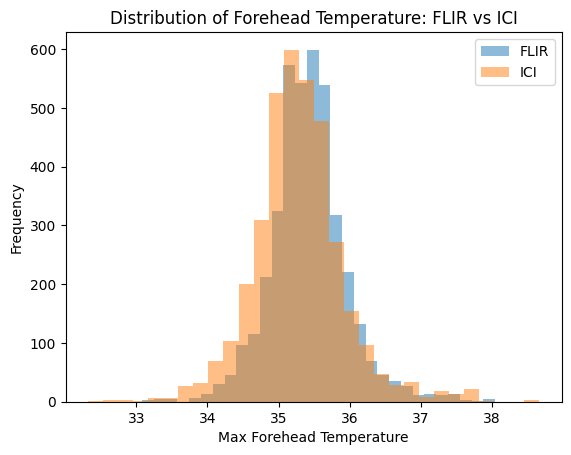

In [7]:
# Select columns starting with "T_FH_Max"
flir_cols = [c for c in flir.columns if c.startswith('T_FH_Max')]
ici_cols = [c for c in ici.columns if c.startswith('T_FH_Max')]

# Flatten values and drop NaNs
flir_data = flir[flir_cols].values.flatten()
flir_data = flir_data[~pd.isna(flir_data)]
ici_data = ici[ici_cols].values.flatten()
ici_data = ici_data[~pd.isna(ici_data)]

# Plot distributions on top of each other
plt.figure()
plt.hist(flir_data, bins=30, alpha=0.5, label='FLIR')
plt.hist(ici_data, bins=30, alpha=0.5, label='ICI')
plt.xlabel('Max Forehead Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Forehead Temperature: FLIR vs ICI')
plt.legend()
plt.show()


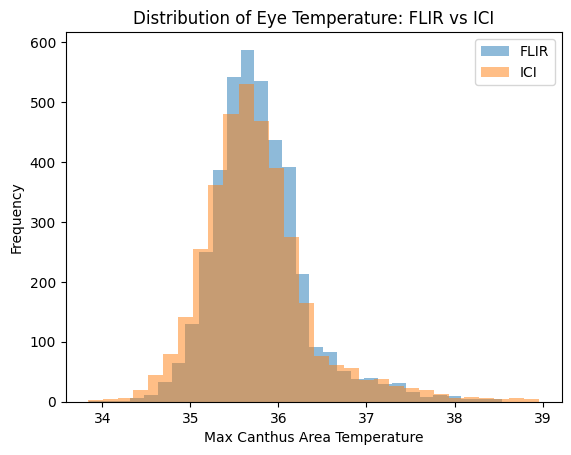

In [8]:
# Select columns starting with "T_FH_Max"
flir_cols = [c for c in flir.columns if c.startswith('canthiMax')]
ici_cols = [c for c in ici.columns if c.startswith('canthiMax')]

# Flatten values and drop NaNs
flir_data = flir[flir_cols].values.flatten()
flir_data = flir_data[~pd.isna(flir_data)]
ici_data = ici[ici_cols].values.flatten()
ici_data = ici_data[~pd.isna(ici_data)]

# Plot distributions on top of each other
plt.figure()
plt.hist(flir_data, bins=30, alpha=0.5, label='FLIR')
plt.hist(ici_data, bins=30, alpha=0.5, label='ICI')
plt.xlabel('Max Canthus Area Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Eye Temperature: FLIR vs ICI')
plt.legend()
plt.show()


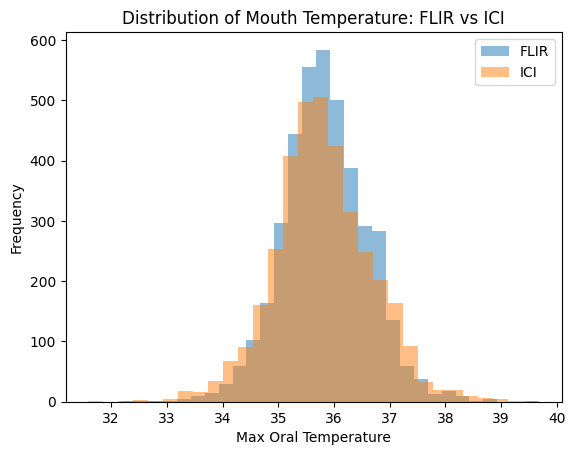

In [9]:
# Select columns starting with "T_FH_Max"
flir_cols = [c for c in flir.columns if c.startswith('T_OR_Max')]
ici_cols = [c for c in ici.columns if c.startswith('T_OR_Max')]

# Flatten values and drop NaNs
flir_data = flir[flir_cols].values.flatten()
flir_data = flir_data[~pd.isna(flir_data)]
ici_data = ici[ici_cols].values.flatten()
ici_data = ici_data[~pd.isna(ici_data)]

# Plot distributions on top of each other
plt.figure()
plt.hist(flir_data, bins=30, alpha=0.5, label='FLIR')
plt.hist(ici_data, bins=30, alpha=0.5, label='ICI')
plt.xlabel('Max Oral Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Mouth Temperature: FLIR vs ICI')
plt.legend()
plt.show()
